Import necessary modules

In [9]:
# somehow in this file trees dont work

## for data
import pandas as pd
import random
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for ML prep amd ML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import linear_model

Reading Data and sampling it to digestible format

In [10]:
df_train = pd.read_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/04_Term 2/10_NLP with Python/02_Assingment 4&5/train_a4_5.csv')

In [11]:
df_test= pd.read_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/04_Term 2/10_NLP with Python/02_Assingment 4&5/test_a4_5.csv')

In [12]:
# take the sample random rather then just the top 10000
df_train_r = df_train.sample(n=10000, random_state=1)



Checking for and removing NaN in keywords

In [13]:
# Checking how many NaN there are, then dropping
df_train_r.info()
df_train_r = df_train_r.dropna(subset=['keywords'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3644682 to 2384596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        10000 non-null  int64 
 1   keywords  8828 non-null   object
 2   age       10000 non-null  int64 
 3   sex       10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


In [14]:
#Verifying if NaN are reduced
df_train_r.info()
# Sex and age given, question what to do with the ngrams
# -> tokenization has already happened, lemmatization could still be done, stopwords?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8828 entries, 3644682 to 2384596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        8828 non-null   int64 
 1   keywords  8828 non-null   object
 2   age       8828 non-null   int64 
 3   sex       8828 non-null   object
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


Rename DF and features for comprehensiveness

In [15]:
df_train_r['sex'].replace('M', 1, inplace = True)
df_train_r['sex'].replace('F', 0, inplace = True)

In [16]:
dtf = df_train_r.rename(columns = {'keywords': 'text', 'sex': 'y'})

In [17]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8828 entries, 3644682 to 2384596
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      8828 non-null   int64 
 1   text    8828 non-null   object
 2   age     8828 non-null   int64 
 3   y       8828 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 344.8+ KB


See distribution for features: 'Sex'

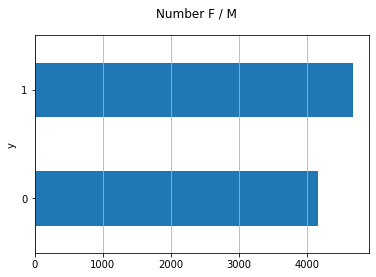

In [18]:
fig, ax = plt.subplots()
fig.suptitle("Number F / M", fontsize=12)
dtf["y"].reset_index().groupby("y").count().sort_values(by=
       "index").plot(kind="barh", legend=False,
        ax=ax).grid(axis='x')
plt.show()

# Difference between occurance seems fair

Bag of Words appraoch:
- reasonable as already word frequency shown in dataset

NLP - create feature matrix

In [19]:
# creating the feature matrix
matrix = CountVectorizer(max_features=2000)
X = matrix.fit_transform(dtf.text).toarray()

In [20]:
y = dtf.y

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Sex Predicition (1 =  M, 0 = F)

Naive Bayes

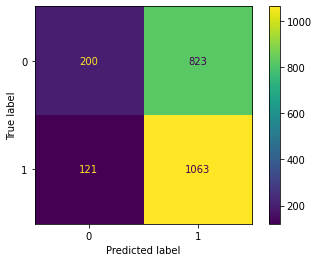

              precision    recall  f1-score   support

           0       0.62      0.20      0.30      1023
           1       0.56      0.90      0.69      1184

    accuracy                           0.57      2207
   macro avg       0.59      0.55      0.50      2207
weighted avg       0.59      0.57      0.51      2207



In [22]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict Class
y_pred_gnb = gnb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_gnb)

# Confusion Matrix
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

# Classification report
print(classification_report(y_test, y_pred_gnb))


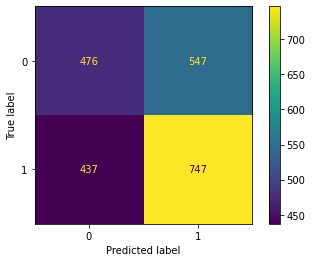

              precision    recall  f1-score   support

           0       0.52      0.47      0.49      1023
           1       0.58      0.63      0.60      1184

    accuracy                           0.55      2207
   macro avg       0.55      0.55      0.55      2207
weighted avg       0.55      0.55      0.55      2207



In [23]:
#Logistic Regression
lr = LogisticRegression(random_state = 42, solver='liblinear')

lr.fit(X_train, y_train)

# Predict Class
y_pred_lr = lr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)

# Confusion Matrix
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

# Classification report
print(classification_report(y_test, y_pred_lr))

# Prediction for hand in


Rename DF and features for comprehensiveness

In [26]:
df_test['sex'].replace('M', 1, inplace = True)
df_test['sex'].replace('F', 0, inplace = True)

In [46]:
dtf = df_test.rename(columns = {'keywords': 'text', 'sex': 'y'})

In [47]:
dtf = dtf.drop(columns = ['age', 'y'])


In [48]:
dtf = dtf.replace(np.nan, '', regex=True)
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111785 entries, 0 to 3111784
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   ID      int64 
 1   text    object
dtypes: int64(1), object(1)
memory usage: 47.5+ MB


In [55]:
dtf_top_10000 = dtf.head(10000)

Bag of Words appraoch:
- reasonable as already word frequency shown in dataset

NLP - create feature matrix

In [56]:
# creating the feature matrix
matrix = CountVectorizer(max_features=2000)
X = matrix.fit_transform(dtf_top_10000.text).toarray()

# Predict Class
Sex_pred_lr = lr.predict(X)

In [63]:
handin = dtf_top_10000[['ID']]
handin['sex'] = Sex_pred_lr
handin

,ID,sex
0,1136369,1
1,2684755,1
2,130714,1
3,338096,0
4,2417963,0
...,...,...
9995,569801,1
9996,1239078,0
9997,2347525,1
9998,326672,1


In [70]:
age = pd.read_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/04_Term 2/10_NLP with Python/02_Assingment 4&5/age.csv', index_col = False)
age = age.drop(columns = ['Unnamed: 0'])

In [72]:
final_handin = pd.merge(age, handin, how = 'left', on = ['ID'])

In [74]:
handin.to_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/04_Term 2/10_NLP with Python/02_Assingment 4&5/final_handin.csv')

In [75]:
hello

NameError: name 'hello' is not defined